#The below dataset consists of historical data of past clients, as shared by an Insurance company.

#**Problem Statement** : Create a ML model that can Predict the insurance charges for the new clients.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Dataset import

df = pd.read_csv("new_insurance_data.csv")

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
## Checking for Null values

df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [ ]:
df.isnull().sum().sum()

52

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
## Checking for Duplicate values

df.duplicated().sum()

0

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1287 non-null   float64
 1   sex                              1287 non-null   object 
 2   bmi                              1287 non-null   float64
 3   children                         1287 non-null   float64
 4   smoker                           1287 non-null   object 
 5   Claim_Amount                     1287 non-null   float64
 6   past_consultations               1287 non-null   float64
 7   num_of_steps                     1287 non-null   float64
 8   Hospital_expenditure             1287 non-null   float64
 9   NUmber_of_past_hospitalizations  1287 non-null   float64
 10  Anual_Salary                     1287 non-null   float64
 11  region                           1287 non-null   object 
 12  charges                  

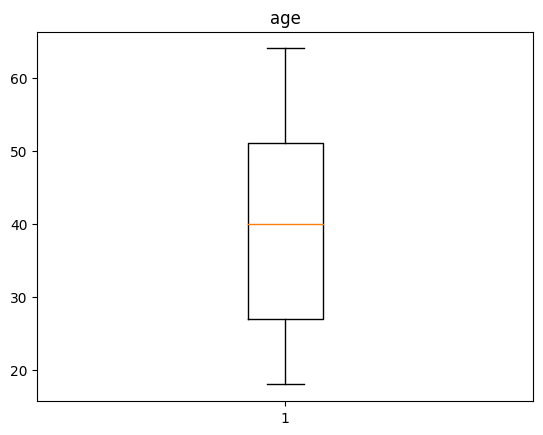

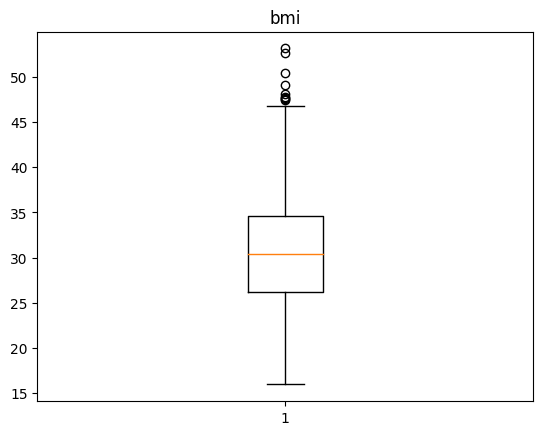

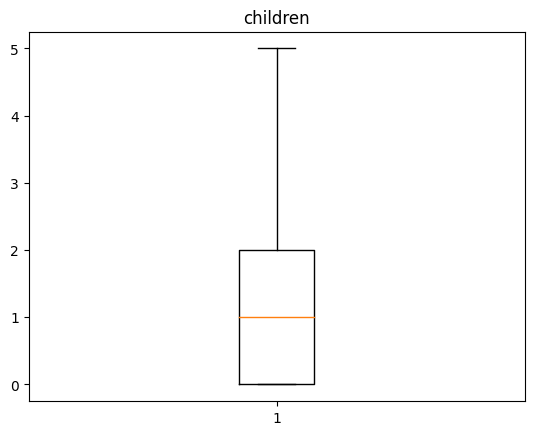

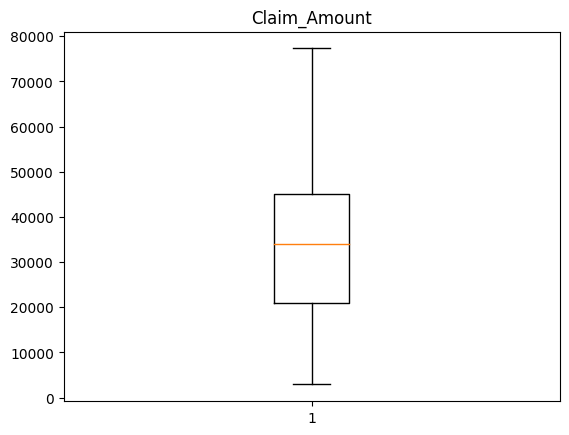

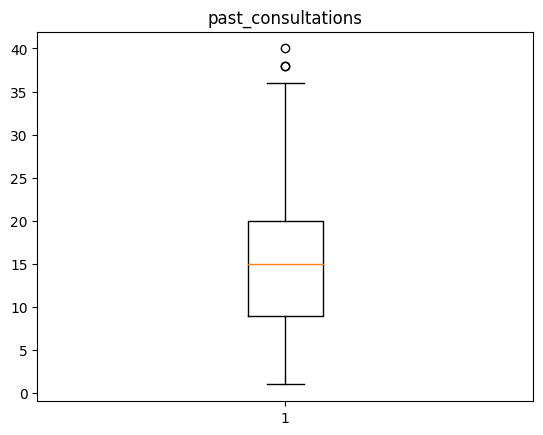

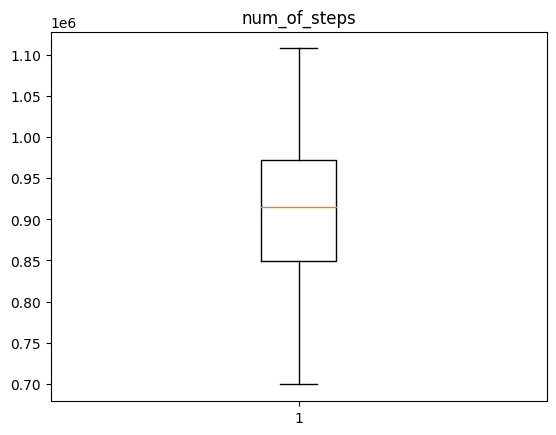

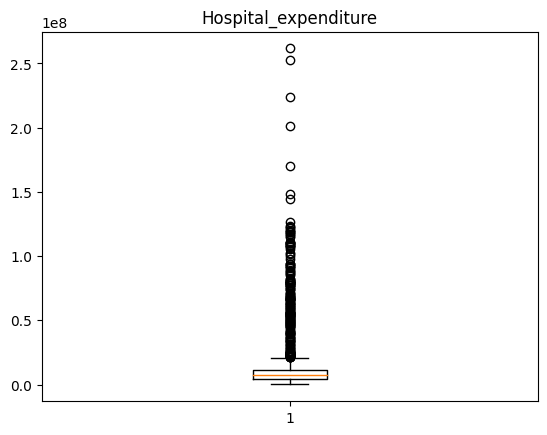

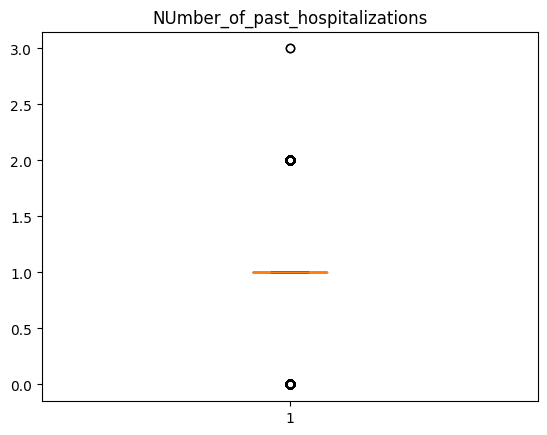

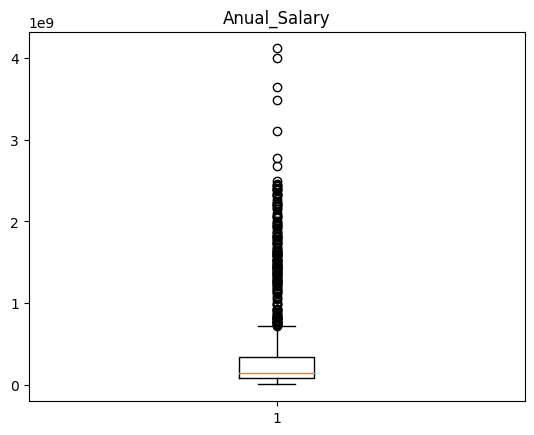

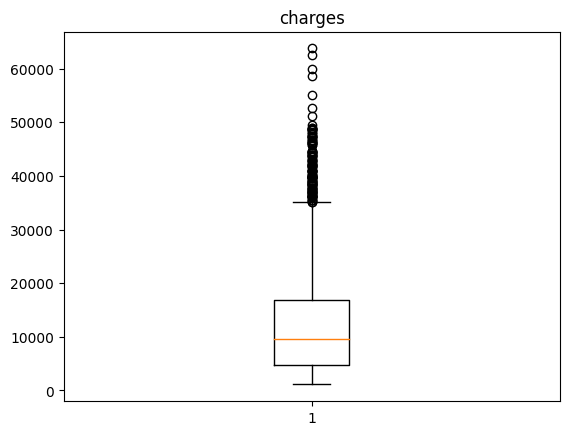

In [ ]:
## Identification of Outliers

for col in df.columns:
  if df[col].dtype != "object":
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()


In [ ]:
## Columns with Outliers

outlier_cols = ["bmi","past_consultations","Hospital_expenditure","Anual_Salary","charges"]

In [ ]:
## Outlier Elimination

for col in outlier_cols:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)
  df = df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]


In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,male,20.13,2.0,yes,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,southeast,18767.73770
1041,24.0,female,27.60,0.0,no,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,southwest,18955.22017
1046,29.0,female,27.94,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.90,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 1050
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              986 non-null    float64
 1   sex                              986 non-null    object 
 2   bmi                              986 non-null    float64
 3   children                         986 non-null    float64
 4   smoker                           986 non-null    object 
 5   Claim_Amount                     986 non-null    float64
 6   past_consultations               986 non-null    float64
 7   num_of_steps                     986 non-null    float64
 8   Hospital_expenditure             986 non-null    float64
 9   NUmber_of_past_hospitalizations  986 non-null    float64
 10  Anual_Salary                     986 non-null    float64
 11  region                           986 non-null    object 
 12  charges                   

In [ ]:
## Data Preprocessing using Label Encoder

from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

In [ ]:
le.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.13,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2,18767.73770
1041,24.0,0,27.60,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3,18955.22017
1046,29.0,0,27.94,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.90,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400


In [ ]:
## Feature selection

df.corr()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.003647,0.157363,0.046903,-0.205838,0.106907,0.178307,0.763756,0.161881,0.527364,0.508866,0.018011,0.682315
sex,-0.003647,1.000000,0.010777,0.022200,0.020767,-0.033575,0.001858,-0.058674,-0.004635,-0.082260,-0.025345,-0.017551,-0.039046
bmi,0.157363,0.010777,1.000000,0.012556,-0.203690,0.013019,0.017543,0.043881,0.013951,0.022507,0.007997,0.160247,0.019630
children,0.046903,0.022200,0.012556,1.000000,-0.028992,0.037777,0.043747,0.219064,-0.008496,0.309678,0.066027,0.049654,0.131216
smoker,-0.205838,0.020767,-0.203690,-0.028992,1.000000,0.144309,0.141036,0.297142,0.274776,0.084012,0.506264,-0.016182,0.435330
Claim_Amount,0.106907,-0.033575,0.013019,0.037777,0.144309,1.000000,0.070665,0.187298,0.050630,0.108704,0.169931,0.004817,0.194932
past_consultations,0.178307,0.001858,0.017543,0.043747,0.141036,0.070665,1.000000,0.265269,0.088732,0.135027,0.273144,0.022856,0.286770
num_of_steps,0.763756,-0.058674,0.043881,0.219064,0.297142,0.187298,0.265269,1.000000,0.309669,0.715836,0.794464,-0.044130,0.942969
Hospital_expenditure,0.161881,-0.004635,0.013951,-0.008496,0.274776,0.050630,0.088732,0.309669,1.000000,0.131773,0.378125,0.019383,0.366163
NUmber_of_past_hospitalizations,0.527364,-0.082260,0.022507,0.309678,0.084012,0.108704,0.135027,0.715836,0.131773,1.000000,0.373849,-0.049122,0.532328


<Axes: >

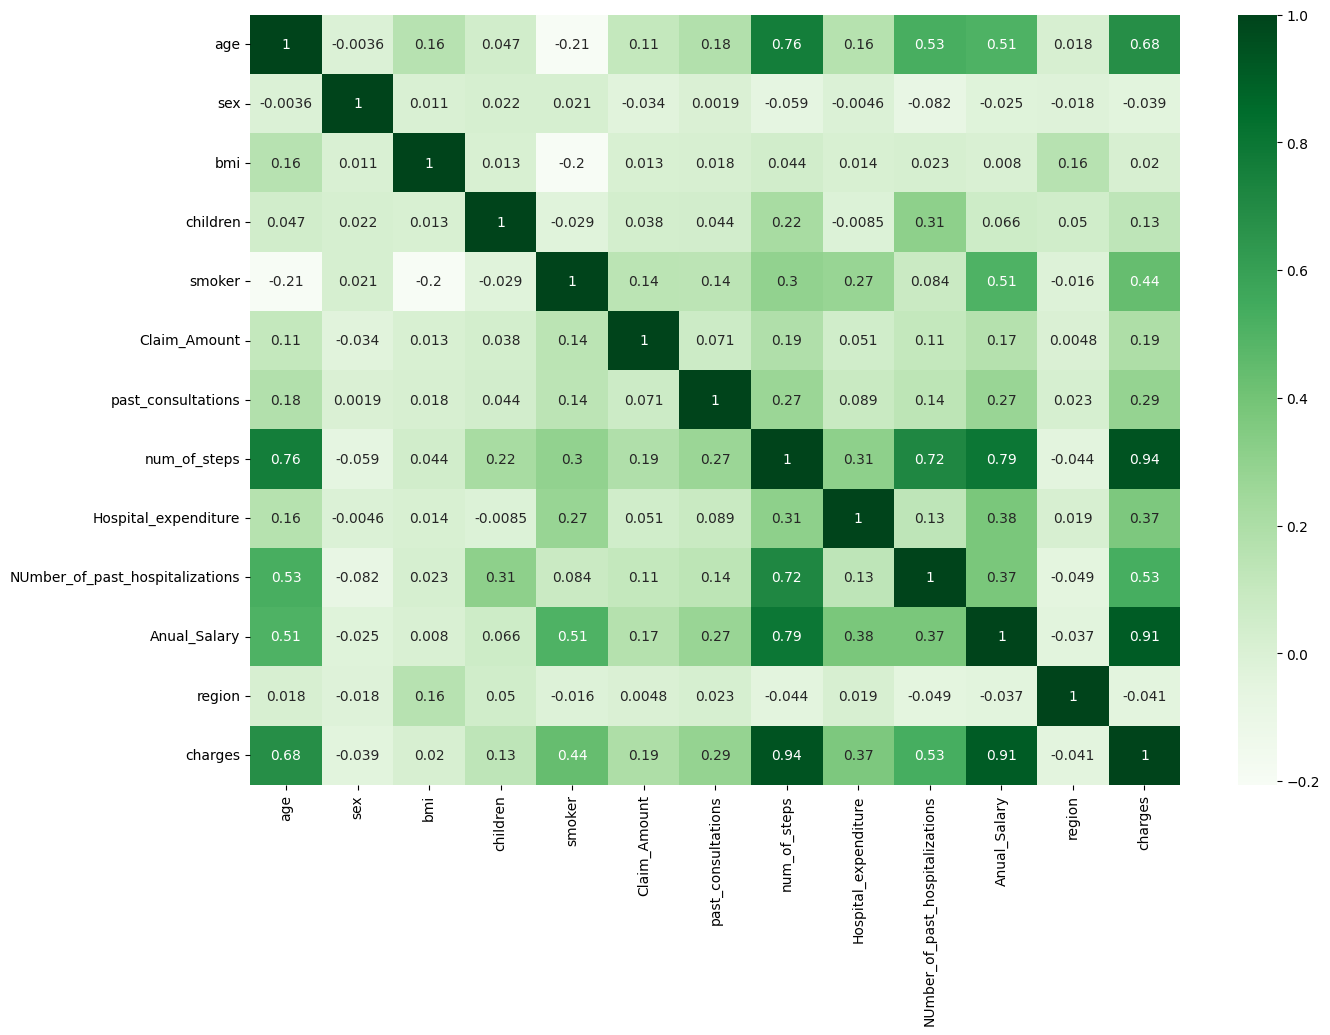

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True, cmap = "Greens")


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
important_features = ["Anual_Salary","num_of_steps","age","NUmber_of_past_hospitalizations"]

In [ ]:
## Independent Variables

X = df[important_features]
X

,Anual_Salary,num_of_steps,age,NUmber_of_past_hospitalizations
0,5.578497e+07,715428.0,18.0,0.0
1,1.370089e+07,699157.0,18.0,0.0
2,7.352311e+07,702341.0,18.0,0.0
3,7.581968e+07,700250.0,18.0,0.0
4,2.301232e+07,711584.0,18.0,0.0
...,...,...,...,...
1036,3.687871e+08,984247.0,43.0,1.0
1041,3.743228e+08,980010.0,24.0,1.0
1046,3.712188e+08,993751.0,29.0,1.0
1048,3.812895e+08,989387.0,31.0,1.0


In [ ]:
## Dependent Variables

y = df["charges"]
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1036,18767.73770
1041,18955.22017
1046,19107.77960
1048,19199.94400


In [ ]:
## Splitting Training and Test data

from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.30,random_state=23)

In [ ]:
x_train

,Anual_Salary,num_of_steps,age,NUmber_of_past_hospitalizations
431,8.033099e+07,865911.0,38.0,1.0
321,7.801004e+07,844216.0,26.0,1.0
370,1.135806e+08,858554.0,32.0,1.0
646,1.156813e+08,912029.0,48.0,1.0
171,1.073871e+07,798315.0,19.0,1.0
...,...,...,...,...
998,2.913115e+08,959666.0,27.0,1.0
1017,3.374124e+08,972338.0,20.0,1.0
51,9.678199e+07,746292.0,18.0,0.0
786,1.651676e+08,944051.0,53.0,1.0


In [ ]:
y_train

,charges
431,6079.67150
321,4564.19145
370,5152.13400
646,8978.18510
171,2730.10785
...,...
998,16420.49455
1017,17560.37975
51,1705.62450
786,11253.42100


In [ ]:
x_test

,Anual_Salary,num_of_steps,age,NUmber_of_past_hospitalizations
1013,3.304683e+08,975702.0,19.0,1.0
182,8.257539e+07,804725.0,29.0,1.0
120,7.093184e+07,769957.0,18.0,0.0
732,1.823730e+08,915205.0,49.0,1.0
889,2.360175e+08,948806.0,60.0,1.0
...,...,...,...,...
943,2.257385e+08,942736.0,63.0,1.0
597,9.897587e+07,898383.0,46.0,1.0
510,1.303457e+08,883153.0,44.0,1.0
692,1.474749e+08,931543.0,52.0,1.0


In [ ]:
y_test

,charges
1013,17352.68030
182,2866.09100
120,2207.69745
732,10370.91255
889,12741.16745
...,...
943,13887.96850
597,8342.90875
510,7147.47280
692,9722.76950


In [ ]:
## Building the Linear Regression Model

from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
## Training the Linear Regression Model

model.fit(x_train,y_train)

LinearRegression()

In [ ]:
## Testing the Linear Regression Model
## Prediction

y_pred = model.predict(x_test)
y_pred

array([16525.11326323,  3034.61144948,  3164.63253419, 10448.82813278,
       13101.47883993, 10422.95064656, 10457.26355521,  3569.22671808,
       14820.66199068,  4324.34192129,  5848.14309623, 11892.00146063,
        2661.57582318, 13674.45893821, 13227.80242182,  2976.58649997,
        2672.81174793,  9325.98264794, 12921.81716655,  3111.19754539,
        5786.53320501, 12959.04157471, 11319.95466297,  1614.0524404 ,
        1643.23796109,  5919.37902374,  9413.56725893, 12911.82698493,
         132.25829966,  5429.59493387, 12413.54914655,  8883.40068762,
       10039.02819442, 11749.8658604 , 12067.11734574,   229.40520581,
        2287.03615894,  7311.98220485,  7380.17533723,  6032.87185256,
        5091.16252025,  3537.54340715,  4995.36097603,  6231.49081827,
        3893.3504354 ,  2941.45659021,  1927.22337195,  8952.15939849,
        2112.3413519 ,  2934.22249772,  3898.32277832,  8399.33870072,
        9862.24220495,  3526.37345217,  9181.45311154,  5656.08629257,
      

In [ ]:
y_test

,charges
1013,17352.68030
182,2866.09100
120,2207.69745
732,10370.91255
889,12741.16745
...,...
943,13887.96850
597,8342.90875
510,7147.47280
692,9722.76950


In [ ]:
## Evaluating the Accuracy of the Linear Regression Model

from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
## Mean Squred Error (MSE)

mean_squared_error(y_test,y_pred)

649282.8044018577

In [ ]:
## Root-Mean Squred Error (RMSE)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

805.7808662420929

In [ ]:
## R2 Score

r2_score(y_test,y_pred)

0.9649026606724393

In [ ]:
r2_score(y_test,y_pred) * 100

96.49026606724394